In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

mouse_df = pd.read_csv("C:\\Users\\AFCummings\\git\\DataVizClass\\matplotlib-challenge\\Resources\\mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("C:\\Users\\AFCummings\\git\\DataVizClass\\matplotlib-challenge\\Resources\\clinicaltrial_data.csv")


combined_df = pd.merge(clinical_trial_df,mouse_df,on='Mouse ID',how='left')

combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [115]:
group_df = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_tumor_df = group_df.mean()

avg_tumor_df = avg_tumor_df.reset_index()

avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [116]:
tumor_se = group_df.sem()

tumor_df = pd.DataFrame(tumor_se)

tumor_standard_errors_df.reset_index(inplace=True)
tumor_standard_errors_df.head(20)

,level_0,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,0,Capomulin,0,0.000000
1,1,1,Capomulin,5,0.448593
2,2,2,Capomulin,10,0.702684
3,3,3,Capomulin,15,0.838617
4,4,4,Capomulin,20,0.909731
5,5,5,Capomulin,25,0.881642
6,6,6,Capomulin,30,0.934460
7,7,7,Capomulin,35,1.052241
8,8,8,Capomulin,40,1.223608
9,9,9,Capomulin,45,1.223977


In [117]:
pivot_df = avg_tumor_df.pivot(columns='Drug',index='Timepoint', values='Tumor Volume (mm3)')

pivot_df.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


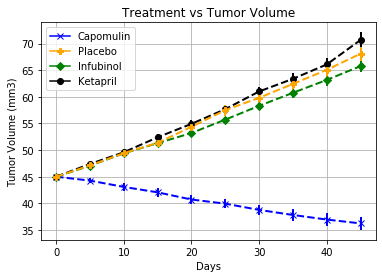

In [118]:
format_drugs = [('Capomulin','x','blue'),('Infubinol','D','green'),('Ketapril','o','black'),('Placebo','P','orange')]
for drug,marker,colors in format_drugs:
    stder = tumor_se[drug]
    treatment_plot = plt.errorbar(pivot_df.index,pivot_df[drug],stder,
                                       fmt=marker, ls = '--',color = colors, linewidth = 2)
    
blue_line = mlines.Line2D([], [], marker='x', color='blue', label='Capomulin')
orange_line = mlines.Line2D([], [], marker='P', color='orange', label='Placebo')
green_line = mlines.Line2D([], [], marker= 'D', color='green', label='Infubinol')
black_line = mlines.Line2D([], [], marker= 'o', color='black', label='Ketapril')

plt.legend(loc='best', handles=[blue_line, orange_line, green_line, black_line])    
    
plt.title('Treatment vs Tumor Volume')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

In [119]:
group2_df = complete_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg2_df = group2_df.mean()

avg2_df = avg2_df.reset_index()

avg_met_df.head(20)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [120]:
met_se = group2_df.sem()

met_se_df = pd.DataFrame(met_se)

met_se_df.reset_index(inplace=True)
met_se_df.head(20)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [121]:
pivot2_df = avg2_df.pivot(columns = 'Drug',index = 'Timepoint', values = 'Metastatic Sites')

pivot2_df.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


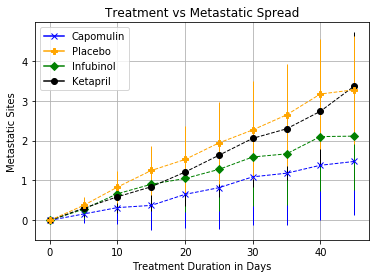

In [122]:
for drug,marker,colors in format_drugs:
    ster = met_se[drug]
    treatment_plot2 = plt.errorbar(pivot2_df.index, pivot2_df[drug],stder,
                                       fmt = marker, ls='--', color = colors, linewidth = 1)

blue_line = mlines.Line2D([], [], marker='x', color='blue', label='Capomulin')
orange_line = mlines.Line2D([], [], marker='P', color='orange', label='Placebo')
green_line = mlines.Line2D([], [], marker= 'D', color='green', label='Infubinol')
black_line = mlines.Line2D([], [], marker= 'o', color='black', label='Ketapril')

plt.legend(loc='best', handles=[blue_line, orange_line, green_line, black_line])    
    
plt.title('Treatment vs Metastatic Spread')
plt.xlabel('Treatment Duration in Days')
plt.ylabel('Metastatic Sites')
plt.grid()


In [123]:
group_mice_df = combined_df.groupby(['Drug','Timepoint'])['Mouse ID']
count_mice_df = group_mice_df.nunique()
count_mice_df = pd.DataFrame(count_mice_df)

count_mice_df.reset_index(inplace=True)
count_mice_df=count_mice_df.rename(columns = {'Mouse ID':'Mouse Count'})

count_mice_df.head(20)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [124]:
pivot_mice_df = count_mice_df.pivot(columns='Drug',index='Timepoint',values='Mouse Count')

pivot_mice_df.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


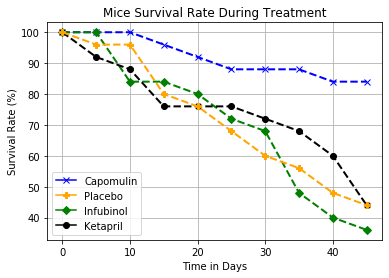

In [125]:
for drug,marker,colors in format_drugs:
    mice = pivot_mice_df[drug][0]
    survival_pct = (pivot_mice_df[drug]/mice)*100
    survivalpct_vs_treatment_plot = plt.plot(pivot_mice_df.index, survival_pct,
                                       marker = marker, ls = '--', color = colors, linewidth = 2)

blue_line = mlines.Line2D([], [], marker='x', color='blue', label='Capomulin')
orange_line = mlines.Line2D([], [], marker='P', color='orange', label='Placebo')
green_line = mlines.Line2D([], [], marker= 'D', color='green', label='Infubinol')
black_line = mlines.Line2D([], [], marker= 'o', color='black', label='Ketapril')

plt.legend(loc='best', handles=[blue_line, orange_line, green_line, black_line]) 

plt.title('Mice Survival Rate During Treatment')
plt.xlabel('Time in Days')
plt.ylabel('Survival Rate (%)')
plt.grid()


In [126]:
pct_change = (pivot_df.iloc[-1]/(pivot_df.iloc[0])-1)*100

pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

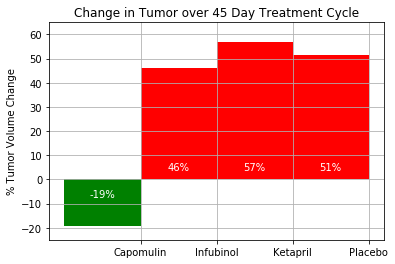

In [127]:
check = pct_change < 0

drug_names = ['Capomulin','Infubinol','Ketapril','Placebo']
pct_change_drugs = [(percentage_change[drug])for drug in drug_list]
plot_change = plt.bar(drug_names, pct_change_drugs, width = -1,align = 'edge', color = check.map({True:'g',False:'r'}))
plt.ylim(-25,65)
plt.grid()
plt.title('Change in Tumor over 45 Day Treatment Cycle')
plt.ylabel('% Tumor Volume Change')

def label_bar(data):
    for d in data:
        height = d.get_height()
        if height > 0:
            label_position = 3
        else:
            label_position = -8
        plt.text(d.get_x() + d.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
label_bar(plot_change)